### Project Data Visualization on Exchange Rates

##### Part Introduction 
**Overview**

It wasn't until 1999 that the euro really began its journey, when 11 countries (Austria, Belgium, Finland, France, Germany, Ireland, Italy, Luxembourg, the Netherlands, Portugal and Spain) fixed their exchange rates and created a new currency with monetary policy passed to the European Central Bank. Today euro is 20+ years old.

Dataset contains date and Euro rate corresponding to Argentine peso, Australian dollar, Bulgarian lev, Brazilian real, Canadian dollar, Swiss franc, Chinese yuan renminbi, Cypriot pound, Czech koruna, Danish krone, Algerian dinar, Estonian kroon, UK pound sterling, Greek drachma, Hong Kong dollar, Croatian kuna, Hungarian forint, Indonesian rupiah, Israeli shekel, Indian rupee, Iceland krona, Japanese yen, Korean won, Lithuanian litas, Latvian lats, Moroccan dirham, Maltese lira, Mexican peso, Malaysian ringgit, Norwegian krone, New Zealand dollar, Philippine peso, Polish zloty, Romanian leu, Russian rouble, Swedish krona, Singapore dollar, Slovenian tolar, Slovak koruna, Thai baht, Turkish lira, New Taiwan dollar, US dollar, South African rand.

**Assumptions**

Some currency in the list doesn't exist anymore; it was replaced by the Euro €: Cypriot pound (2007), Estonian kroon (2011), Greek drachma (2002), Lithuanian litas (2015), Latvian lats (2014), Maltese lira (2008), Slovenian tolar (2007), Slovak koruna (2009).

Bulgarian lev since 2002 is pegged to the Euro: 1 € = 1.9558 leva.

**Questions** 

Storytelling Data Visualization on Exchange Rates.

Show how the euro and dollar has changed during the 2007-2008's financial crisis, and commarison the data for 2016 and 2009.

Show how it has changed during the coronavarius pandamic. The 2020 data and the 2016-2019 data as baseline.

Show conparatively how the euro and dollar rate changed under the last three US presidents.

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style #style for plot
style.use('fivethirtyeight')

In [37]:
rates=pd.read_csv('datasets/euro-daily-hist_1999_2022 2.csv')
rates.head()
rates.tail()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
5953,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855
5954,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
5955,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
5956,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
5957,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358


In [5]:
rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5958 entries, 0 to 5957
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5958 non-null   object 
 1   [Australian dollar ]      5958 non-null   object 
 2   [Bulgarian lev ]          5556 non-null   object 
 3   [Brazilian real ]         5690 non-null   object 
 4   [Canadian dollar ]        5958 non-null   object 
 5   [Swiss franc ]            5958 non-null   object 
 6   [Chinese yuan renminbi ]  5690 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5958 non-null   object 
 9   [Danish krone ]           5958 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5958 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5958 non-null   object 
 14  [Croatia

#### Data Cleaning

In [270]:
rates.rename(columns={'[US dollar ]': 'US_dollar',
                     'Period\\Unit:': 'DateTime'}, inplace=True)
rates['DateTime'] = pd.to_datetime(rates['DateTime'])   
rates.sort_values('DateTime', inplace=True)
rates.reset_index(drop=True, inplace=True)
rates.tail()

,DateTime,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],US_dollar,[South African rand ]
5953,2022-01-04,1.5682,1.9558,6.4174,1.4382,1.0355,7.1924,NaN,24.745,7.4378,...,4.9481,84.9202,10.2808,1.5310,NaN,NaN,37.5820,15.1384,1.1279,18.1080
5954,2022-01-05,1.5600,1.9558,6.4146,1.4399,1.0364,7.2087,NaN,24.581,7.4384,...,4.9460,85.7275,10.2545,1.5340,NaN,NaN,37.6070,15.2446,1.1319,17.9369
5955,2022-01-06,1.5778,1.9558,6.4420,1.4451,1.0395,7.2187,NaN,24.528,7.4393,...,4.9435,86.5088,10.3265,1.5388,NaN,NaN,37.9620,15.5504,1.1315,17.7932
5956,2022-01-07,1.5804,1.9558,6.4343,1.4374,1.0422,7.2060,NaN,24.439,7.4380,...,4.9451,85.2980,10.2839,1.5356,NaN,NaN,38.0740,15.7206,1.1298,17.6701
5957,2022-01-10,1.5774,1.9558,6.3969,1.4327,1.0446,7.2128,NaN,24.357,7.4381,...,4.9449,84.9825,10.3038,1.5344,NaN,NaN,38.0740,15.7183,1.1318,17.6999


In [26]:
euroTodollar=rates[['DateTime', 'US_dollar']].copy()
euroTodollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.0888     6
          ..
1.3001     1
0.9762     1
1.2288     1
1.2703     1
1.0812     1
Name: US_dollar, Length: 3592, dtype: int64

In [27]:
euroTodollar = euroTodollar[euroTodollar['US_dollar'] != '-']
euroTodollar['US_dollar'] = euroTodollar['US_dollar'].astype(float)
euroTodollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5896 entries, 0 to 5957
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DateTime   5896 non-null   datetime64[ns]
 1   US_dollar  5896 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 138.2 KB


#### Rolling Average
A rolling mean can help us find trends

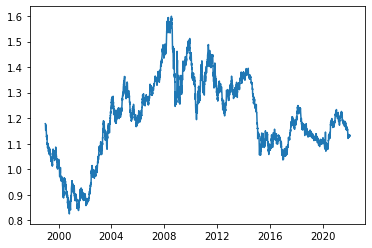

In [30]:
plt.plot(euroTodollar['DateTime'], euroTodollar['US_dollar'])
plt.show()

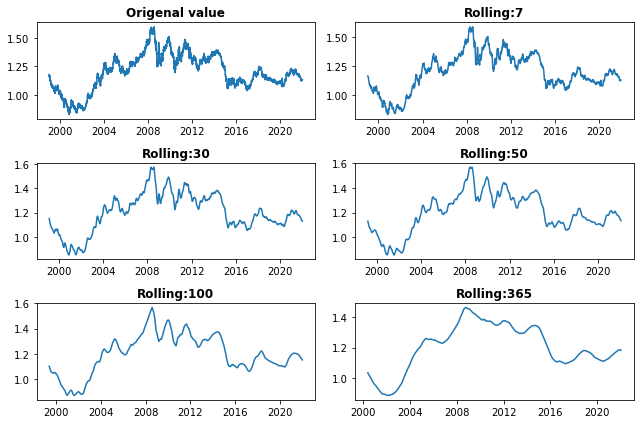

In [34]:
plt.figure(figsize=(9,6))
plt.subplot(3,2,1)
plt.plot(euroTodollar['DateTime'],euroTodollar['US_dollar'])
plt.title('Origenal value', weight='bold')

for i, rolling_mean in zip([2, 3, 4, 5, 6],[7, 30, 50, 100, 365]):
    plt.subplot(3,2,i)
    plt.plot(euroTodollar['DateTime'], euroTodollar['US_dollar'].rolling(rolling_mean).mean())
    plt.title('Rolling:' + str(rolling_mean), weight='bold')
    
plt.tight_layout()
plt.show()

In [35]:
euroTodollar['rolling_mean'] = euroTodollar['US_dollar'].rolling(30).mean()
euroTodollar

,DateTime,US_dollar,rolling_mean
0,1999-01-04,1.1789,NaN
1,1999-01-05,1.1790,NaN
2,1999-01-06,1.1743,NaN
3,1999-01-07,1.1632,NaN
4,1999-01-08,1.1659,NaN
...,...,...,...
5953,2022-01-04,1.1279,1.129933
5954,2022-01-05,1.1319,1.130310
5955,2022-01-06,1.1315,1.130617
5956,2022-01-07,1.1298,1.130640


#### Financial Crisis 

In [38]:
fin_crisis_6_9 = euroTodollar.copy()[
                                (euroTodollar['DateTime'].dt.year >= 2006
                                )&(euroTodollar['DateTime'].dt.year <= 2009)]
fin_crisis_7_8 = euroTodollar.copy()[
                                (euroTodollar['DateTime'].dt.year >= 2007
                                )&(euroTodollar['DateTime'].dt.year <= 2008)]

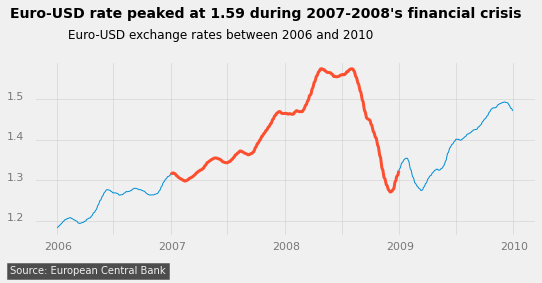

In [264]:
fig,ax = plt.subplots(figsize=(8,3))
ax.plot(fin_crisis_6_9['DateTime'],
       fin_crisis_6_9['rolling_mean'],
       linewidth=1)
ax.plot(fin_crisis_7_8['DateTime'],
       fin_crisis_7_8['rolling_mean'],
       linewidth=3)


ax.set_xticklabels([])
ax.set_yticklabels([])

x = 13110.0
for year in ['2006', '2007', '2008', '2009', '2010']:
    ax.text(x, 1.13, year, alpha=0.5, fontsize=11)
    x += 365

y = 1.2   
for rate in ['1.2', '1.3', '1.4', '1.5']:
    ax.text(12990.0, y, rate, alpha=0.5, fontsize=11)
    y += 0.1

## Adding a title and a subtitle    
ax.text(13000.0, 1.7, "Euro-USD rate peaked at 1.59 during 2007-2008's financial crisis", weight='bold')
ax.text(13185.0, 1.65, 'Euro-USD exchange rates between 2006 and 2010', size=12)

ax.text(13000.0, 1.07, 'Source: European Central Bank', color = '#f0f0f0', backgroundcolor = '#4d4d4d', size=10)

ax.grid(alpha=0.5)

plt.show()


#### The USA Presidents

In [271]:
bush_obama_trump = euroTodollar.copy(
                   )[(euroTodollar['DateTime'].dt.year >= 2001) & (euroTodollar['DateTime'].dt.year < 2022)]
bush = bush_obama_trump.copy(
       )[bush_obama_trump['DateTime'].dt.year < 2009]
obama = bush_obama_trump.copy(
       )[(bush_obama_trump['DateTime'].dt.year >= 2009) & (bush_obama_trump['DateTime'].dt.year < 2017)]
trump = bush_obama_trump.copy(
       )[(bush_obama_trump['DateTime'].dt.year >= 2017) & (bush_obama_trump['DateTime'].dt.year < 2022)]

<ipython-input-274-1e5a5b110d67>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '', '2007', '', '2009'], alpha=0.3)
<ipython-input-274-1e5a5b110d67>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '', '2015', '', '2017'], alpha=0.3)
<ipython-input-274-1e5a5b110d67>:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(['2017', '', '2018', '', '2019', '', '2021', '', '2022'], alpha=0.3)


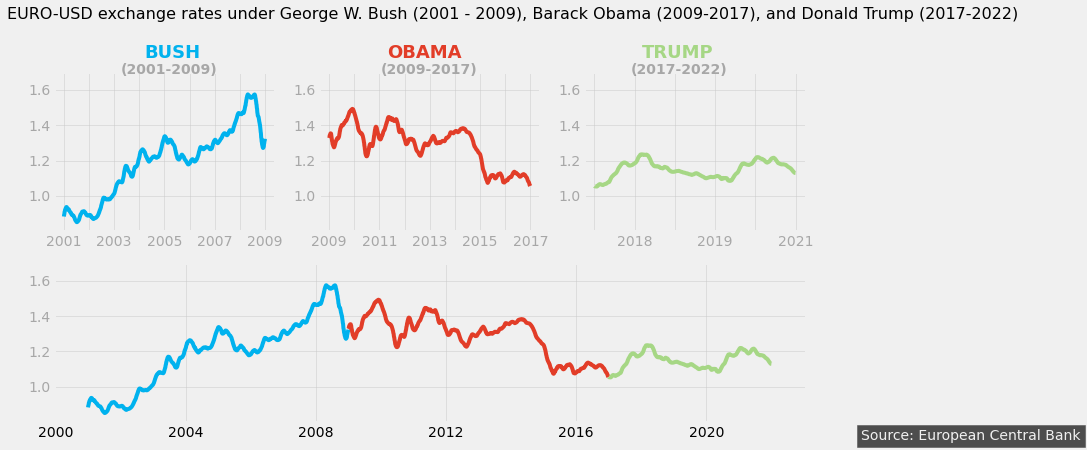

In [274]:
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3, ax4]


for ax in axes:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2','1.4', '1.6'],
                   alpha=0.3)
    ax.grid(alpha=0.5)    
    

# Ax1
ax1.plot(bush['DateTime'], bush['rolling_mean'], color='#00B2EE')
ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '', '2007', '', '2009'], alpha=0.3)
ax1.text(12500.0, 1.78, 'BUSH', fontsize=18, weight='bold', color='#00B2EE')
ax1.text(12150.0, 1.69, '(2001-2009)', weight='bold', alpha=0.3)

# Ax2
ax2.plot(obama['DateTime'], obama['rolling_mean'], color='#e23d28')
ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '', '2015', '', '2017'], alpha=0.3)
ax2.text(15090.0, 1.78, 'OBAMA', fontsize=18, weight='bold', color='#e23d28')
ax2.text(15000.0, 1.69, '(2009-2017)', weight='bold', alpha=0.3)

# Ax3
ax3.plot(trump['DateTime'], trump['rolling_mean'], color='#A6D785')
ax3.set_xticklabels(['2017', '', '2018', '', '2019', '', '2021', '', '2022'], alpha=0.3)
ax3.text(17600.0, 1.78, 'TRUMP', fontsize=18, weight='bold', color='#A6D785')
ax3.text(17500.0, 1.69, '(2017-2022)', weight='bold', alpha=0.3)

# Ax4
ax4.plot(bush['DateTime'], bush['rolling_mean'],color='#00B2EE')
ax4.plot(obama['DateTime'], obama['rolling_mean'], color='#e23d28')
ax4.plot(trump['DateTime'], trump['rolling_mean'], color='#A6D785')


ax1.text(10500.0, 2.0, 'EURO-USD exchange rates under George W. Bush (2001 - 2009), Barack Obama (2009-2017), and Donald Trump (2017-2022)', fontsize=16)

ax4.text(20000.0, 0.7,  'Source: European Central Bank', color = '#f0f0f0', backgroundcolor = '#4d4d4d', size=14)

plt.show()